In [1]:
!gdown https://drive.google.com/uc?id=1F_kgansR4sOW4FYPLHE0BU-yVOTJJDGR

Downloading...
From: https://drive.google.com/uc?id=1F_kgansR4sOW4FYPLHE0BU-yVOTJJDGR
To: /content/kaggle.json
100% 63.0/63.0 [00:00<00:00, 246kB/s]


In [2]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 74% 49.0M/66.0M [00:01<00:00, 50.2MB/s]
100% 66.0M/66.0M [00:01<00:00, 54.4MB/s]


In [4]:
! unzip creditcardfraud.zip -d /content/

Archive:  creditcardfraud.zip
  inflating: /content/creditcard.csv  


## 3-3: Implementing the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

Reading the dataset

In [2]:
df = pd.read_csv("/content/creditcard.csv")
df.drop(['Time'],axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


data pre-processing

In [3]:
X = df.drop(['Class'],axis=1).values
y = df['Class'].values

print(f'Shape of X: {X.shape}')
print(f'Data distribution of Class:\n{df.Class.value_counts()}')

Shape of X: (284807, 29)
Data distribution of Class:
Class
0    284315
1       492
Name: count, dtype: int64


In [4]:
from matplotlib import cm

<ipython-input-5-307c46eb7e38>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2');


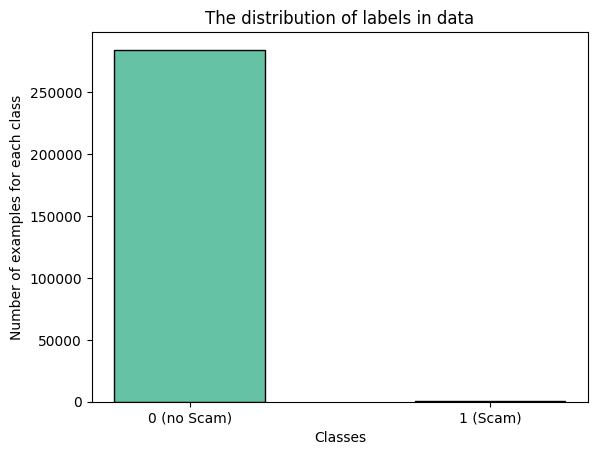

In [5]:
hist, bins = np.histogram(y,bins=2)
cmap = cm.get_cmap('Set2');

bins = np.unique(y) # For the bins to come
plt.bar(bins, hist, width=0.5,edgecolor='black',color=cmap(np.linspace(0, 1, len(hist))));
plt.xticks(range(0,2), ['0 (no Scam)', '1 (Scam)']);
plt.title('The distribution of labels in data')
plt.ylabel('Number of examples for each class')
plt.xlabel('Classes');

SMOTE

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
balancer = SMOTE(random_state=42)
X_resampled, y_resampled = balancer.fit_resample(X, y)

print(f'Shape of RESAMPLED X: {X_resampled.shape}')
df1 = pd.DataFrame(y_resampled)
df1.columns = ['Class']
print(f'Data distribution of RESAMPLED Class:\n{df1.Class.value_counts()}')

Shape of RESAMPLED X: (568630, 29)
Data distribution of RESAMPLED Class:
Class
0    284315
1    284315
Name: count, dtype: int64


<ipython-input-8-0f19155a9575>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Set2');


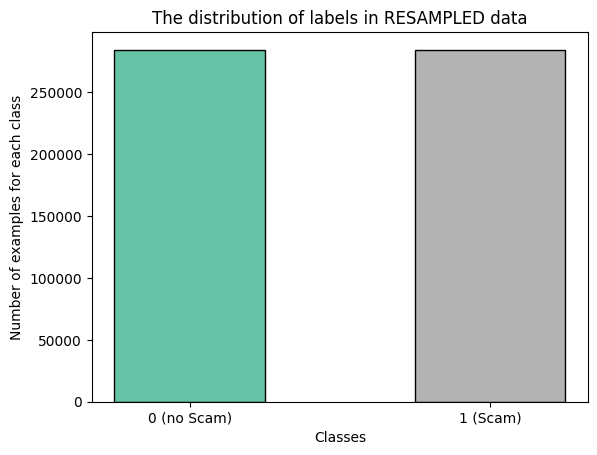

In [8]:
hist, bins = np.histogram(y_resampled,bins=2)
cmap = cm.get_cmap('Set2');

bins = np.unique(y_resampled) # For the bins to come
plt.bar(bins, hist, width=0.5,edgecolor='black',color=cmap(np.linspace(0, 1, len(hist))));
plt.xticks(range(0,2), ['0 (no Scam)', '1 (Scam)']);
plt.title('The distribution of labels in RESAMPLED data')
plt.ylabel('Number of examples for each class')
plt.xlabel('Classes');

Data split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size = 0.2,
    shuffle = True,
    random_state = 54
)

print(f'Shape of train input data: {x_train.shape}')
print(f'Shape of test input data: {x_test.shape}')

Shape of train input data: (454904, 29)
Shape of test input data: (113726, 29)


In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [12]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

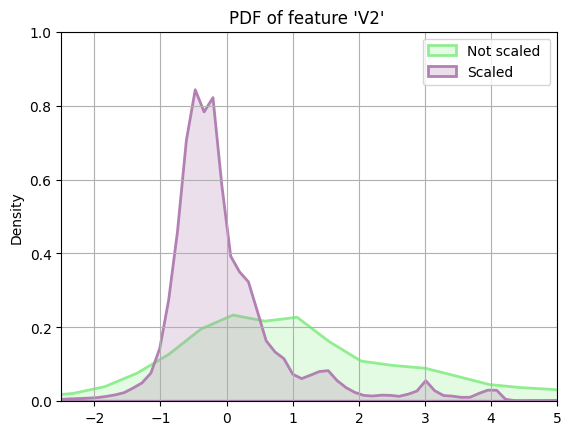

In [13]:
sns.kdeplot(
    x_train[:,1],
    color='lightgreen',
    linewidth=2,
    fill=True,
    label = 'Not scaled '
)
sns.kdeplot(
    x_train_scaled[:,1],
    color = '#B280B2',
    linewidth = 2,
    fill = True,
    label = 'Scaled'
)
plt.xlim(-2.5,5)
plt.ylim(0,1)
plt.legend()
plt.title('PDF of feature \'V2\' ')
plt.grid()

Denoising AE

In [33]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

In [35]:
# Model design
autoencoder = Sequential(
    [
        Input(shape=(x_train_scaled.shape[1],), name='IN'),
        Dense(22, activation='relu', name='EC_1'),
        Dense(15, activation='relu', name='EC_2'),
        Dense(10, activation='relu', name='Latent'),
        Dense(15, activation='relu', name='DC_1'),
        Dense(22, activation='relu', name='DC_2'),
        Dense(x_train_scaled.shape[1], activation='relu', name='OUT')
    ],
    name = 'Autoencoder'
)

autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 EC_1 (Dense)                (None, 22)                660       
                                                                 
 EC_2 (Dense)                (None, 15)                345       
                                                                 
 Latent (Dense)              (None, 10)                160       
                                                                 
 DC_1 (Dense)                (None, 15)                165       
                                                                 
 DC_2 (Dense)                (None, 22)                352       
                                                                 
 OUT (Dense)                 (None, 29)                667       
                                                                 
Total params: 2349 (9.18 KB)
Trainable params: 2349 (9.

In [34]:
from tensorflow.keras import callbacks
from tensorflow.keras.models import clone_model

In [37]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)
checkpoint = callbacks.ModelCheckpoint(
    'best_model_weights.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [38]:
autoencoder.compile(
    loss = MeanSquaredError(),
    optimizer = Adam(learning_rate=0.001)
)

In [ ]:
history = autoencoder.fit(
    x_train_scaled,
    x_train_scaled,
    epochs = 30,
    batch_size = 128,
    validation_data = (x_test_scaled, x_test_scaled),
    callbacks = [checkpoint, early_stopping]
)


In [41]:
autoencoder.save('autoencoder.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


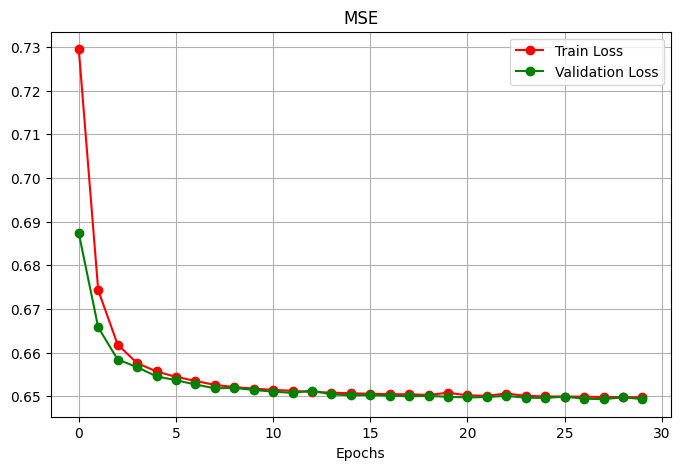

In [42]:
# Train
train_loss = history.history['loss']
# Validation
val_loss = history.history['val_loss']

# Plotting Loss
plt.figure(figsize=(8,5))
plt.plot(train_loss, 'r-o', label='Train Loss')
plt.plot(val_loss, 'g-o', label='Validation Loss')
plt.title('MSE')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

MLP classifier

In [14]:
from tensorflow.keras import metrics
from tensorflow import argmax, math, equal, cast, reduce_sum, logical_and, float32

Denoising input data

In [15]:
!gdown https://drive.google.com/uc?id=1RY9R_A13aRJctOOcyDKG9U7_Ph80tj9G

Downloading...
From: https://drive.google.com/uc?id=1RY9R_A13aRJctOOcyDKG9U7_Ph80tj9G
To: /content/autoencoder.h5
100% 83.0k/83.0k [00:00<00:00, 4.01MB/s]


In [16]:
from tensorflow.keras.models import load_model
auto = load_model('/content/autoencoder.h5')
x_train_denoised = auto.predict(x_train_scaled)
x_test_denoised = auto.predict(x_test_scaled)

3554/3554 [==============================] - 7s 2ms/step


In [55]:
classifier = Sequential(
    [
        Input(shape=(x_train_scaled.shape[1],), name='IN'),
        Dense(22, activation='relu', name='Dense_1'),
        Dense(15, activation='relu', name='Dense_2'),
        Dense(10, activation='relu', name='Dense_3'),
        Dense(5, activation='relu', name='Dense_4'),
        Dense(2, activation='softmax', name='Classifier')
    ],
    name = 'CLASSIFIER'
)

classifier.summary()

Model: "CLASSIFIER"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 22)                660       
                                                                 
 Dense_2 (Dense)             (None, 15)                345       
                                                                 
 Dense_3 (Dense)             (None, 10)                160       
                                                                 
 Dense_4 (Dense)             (None, 5)                 55        
                                                                 
 Classifier (Dense)          (None, 2)                 12        
                                                                 
Total params: 1232 (4.81 KB)
Trainable params: 1232 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [57]:
early_stopping_2 = callbacks.EarlyStopping(monitor='val_acc', patience=3)
checkpoint_2 = callbacks.ModelCheckpoint(
    'best_model_weights.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [58]:
classifier.compile(
    loss = SparseCategoricalCrossentropy(),
    optimizer = Adam(learning_rate=0.001),
    metrics = ['acc']
)

In [59]:
history_class = classifier.fit(
    x_train_denoised,
    y_train,
    epochs = 30,
    batch_size = 128,
    validation_data = (x_test_denoised, y_test),
    callbacks = [checkpoint_2, early_stopping_2]
)

Epoch 1/30
3550/3554 [============================>.] - ETA: 0s - loss: 0.1294 - acc: 0.9530
Epoch 1: val_loss improved from inf to 0.08998, saving model to best_model_weights.h5
3554/3554 [==============================] - 19s 5ms/step - loss: 0.1293 - acc: 0.9530 - val_loss: 0.0900 - val_acc: 0.9664
Epoch 2/30
  41/3554 [..............................] - ETA: 13s - loss: 0.0973 - acc: 0.9649

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3552/3554 [============================>.] - ETA: 0s - loss: 0.0769 - acc: 0.9720
Epoch 2: val_loss improved from 0.08998 to 0.07052, saving model to best_model_weights.h5
3554/3554 [==============================] - 18s 5ms/step - loss: 0.0768 - acc: 0.9720 - val_loss: 0.0705 - val_acc: 0.9741
Epoch 3/30
3552/3554 [============================>.] - ETA: 0s - loss: 0.0651 - acc: 0.9766
Epoch 3: val_loss improved from 0.07052 to 0.06192, saving model to best_model_weights.h5
3554/3554 [==============================] - 17s 5ms/step - loss: 0.0651 - acc: 0.9766 - val_loss: 0.0619 - val_acc: 0.9778
Epoch 4/30
3551/3554 [============================>.] - ETA: 0s - loss: 0.0594 - acc: 0.9787
Epoch 4: val_loss improved from 0.06192 to 0.05748, saving model to best_model_weights.h5
3554/3554 [==============================] - 17s 5ms/step - loss: 0.0594 - acc: 0.9787 - val_loss: 0.0575 - val_acc: 0.9801
Epoch 5/30
3547/3554 [============================>.] - ETA: 0s - loss: 0.0550 - acc: 0.98

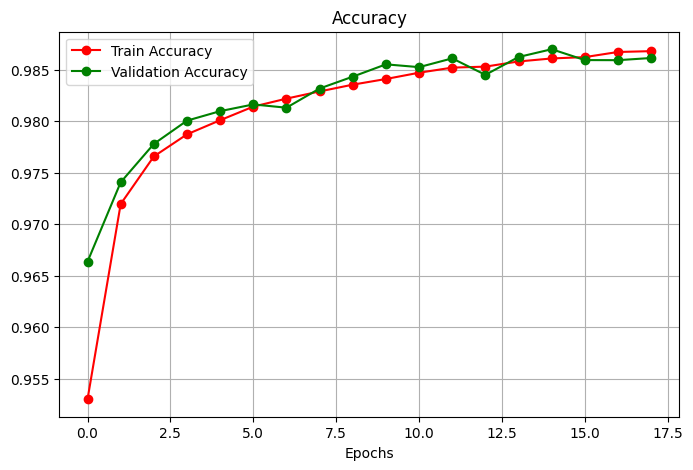

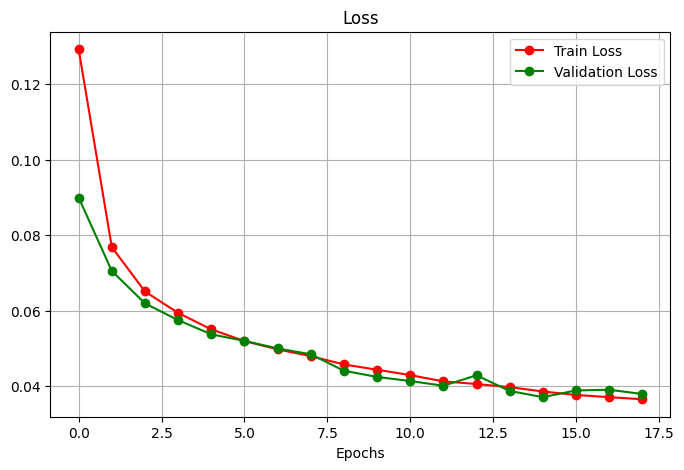

In [60]:
# Train
train_acc = history_class.history['acc']
train_loss = history_class.history['loss']
# Validation
val_acc = history_class.history['val_acc']
val_loss = history_class.history['val_loss']

# Plotting section
# Accuracy
plt.figure(figsize=(8,5))
plt.plot(train_acc, 'r-o', label='Train Accuracy')
plt.plot(val_acc, 'g-o', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
# Loss
plt.figure(figsize=(8,5))
plt.plot(train_loss, 'r-o', label='Train Loss')
plt.plot(val_loss, 'g-o', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

In [61]:
classifier.save('classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3-4: model performance

In [19]:
!gdown https://drive.google.com/uc?id=1-1U_HRFat44k2qYyDU4YNBg2L1RXmsg7

Downloading...
From: https://drive.google.com/uc?id=1-1U_HRFat44k2qYyDU4YNBg2L1RXmsg7
To: /content/classifier.h5
100% 62.2k/62.2k [00:00<00:00, 4.21MB/s]


In [17]:
from tensorflow.keras.models import load_model
classifier = load_model('/content/classifier.h5')

In [18]:
y_hat = classifier.predict(x_test_denoised)

3554/3554 [==============================] - 6s 2ms/step


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
report = classification_report(y_test, np.argmax(y_hat,axis=1), target_names=['no Scam', 'Scam'])
print(report)

              precision    recall  f1-score   support

     no Scam       0.98      0.99      0.99     56820
        Scam       0.99      0.98      0.99     56906

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



Text(0.5, 1.0, 'Confusion Matrix for Test data')

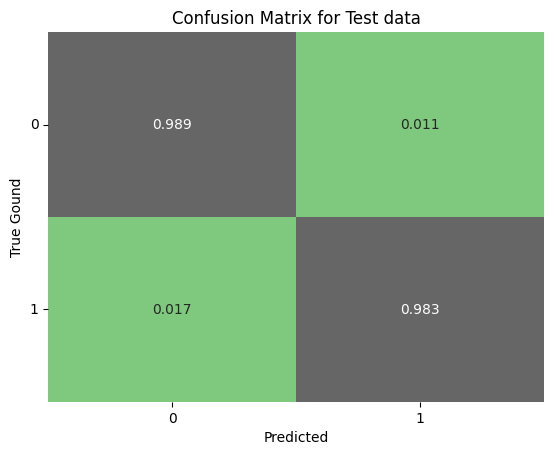

In [85]:
cm = confusion_matrix(y_test, np.argmax(y_hat,axis=1))
cm = cm/np.sum(cm, axis=1).reshape(-1,1)
# Plotting confusion matrix
sns.heatmap(cm, annot=True, cmap='Accent', fmt='.3f',cbar=False);
plt.xticks(np.array(range(0,2)).astype('float32')+0.5, range(0,2));
plt.yticks(np.array(range(0,2)).astype('float32')+0.5, range(0,2), rotation=0);
plt.xlabel('Predicted')
plt.ylabel('True Gound')
plt.title('Confusion Matrix for Test data')

## 3-5: The curve

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score

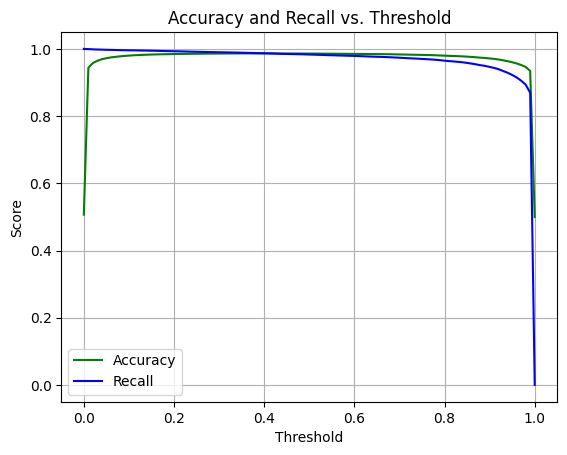

In [26]:
# Make predictions on the validation or test data
y_pred = y_hat[:,1]
# Initialize arrays to store accuracy and recall values
thresholds = np.linspace(0, 1, 100)
accuracies = []
recalls = []

# Iterate over different thresholds
for threshold in thresholds:
    y_pred_binary = (y_pred > threshold).astype(int)
    accuracies.append(accuracy_score(y_test, y_pred_binary))
    recalls.append(recall_score(y_test, y_pred_binary))

# Plot accuracy and recall based on the threshold
plt.plot(thresholds, accuracies,'g-', label='Accuracy')
plt.plot(thresholds, recalls,'b', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Accuracy and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


## 3-6: Unbalanced performance

Data split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    shuffle = True,
    random_state = 54
)

print(f'Shape of train input data: {x_train.shape}')
print(f'Shape of test input data: {x_test.shape}')

Shape of train input data: (227845, 29)
Shape of test input data: (56962, 29)


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [30]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
classifier_2 = Sequential(
    [
        Input(shape=(x_train_scaled.shape[1],), name='IN'),
        Dense(22, activation='relu', name='Dense_1'),
        Dense(15, activation='relu', name='Dense_2'),
        Dense(10, activation='relu', name='Dense_3'),
        Dense(5, activation='relu', name='Dense_4'),
        Dense(2, activation='softmax', name='Classifier')
    ],
    name = 'CLASSIFIER'
)

classifier_2.summary()

Model: "CLASSIFIER"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 22)                660       
                                                                 
 Dense_2 (Dense)             (None, 15)                345       
                                                                 
 Dense_3 (Dense)             (None, 10)                160       
                                                                 
 Dense_4 (Dense)             (None, 5)                 55        
                                                                 
 Classifier (Dense)          (None, 2)                 12        
                                                                 
Total params: 1232 (4.81 KB)
Trainable params: 1232 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [37]:
early_stopping_2 = callbacks.EarlyStopping(monitor='val_acc', patience=3)
checkpoint_2 = callbacks.ModelCheckpoint(
    'best_model_weights.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [38]:
classifier_2.compile(
    loss = SparseCategoricalCrossentropy(),
    optimizer = Adam(learning_rate=0.001),
    metrics = ['acc']
)

In [40]:
history_class_2 = classifier_2.fit(
    x_train_scaled,
    y_train,
    epochs = 30,
    batch_size = 128,
    validation_data = (x_test_scaled, y_test),
    callbacks = [checkpoint_2, early_stopping_2]
)

Epoch 1/30
1781/1781 [==============================] - ETA: 0s - loss: 0.0173 - acc: 0.9977
Epoch 1: val_loss improved from inf to 0.00438, saving model to best_model_weights.h5
1781/1781 [==============================] - 12s 5ms/step - loss: 0.0173 - acc: 0.9977 - val_loss: 0.0044 - val_acc: 0.9981
Epoch 2/30
  20/1781 [..............................] - ETA: 9s - loss: 0.0024 - acc: 0.9984

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1781/1781 [==============================] - ETA: 0s - loss: 0.0037 - acc: 0.9984
Epoch 2: val_loss improved from 0.00438 to 0.00404, saving model to best_model_weights.h5
1781/1781 [==============================] - 12s 7ms/step - loss: 0.0037 - acc: 0.9984 - val_loss: 0.0040 - val_acc: 0.9993
Epoch 3/30
1778/1781 [============================>.] - ETA: 0s - loss: 0.0033 - acc: 0.9994
Epoch 3: val_loss improved from 0.00404 to 0.00376, saving model to best_model_weights.h5
1781/1781 [==============================] - 14s 8ms/step - loss: 0.0033 - acc: 0.9994 - val_loss: 0.0038 - val_acc: 0.9994
Epoch 4/30
1768/1781 [============================>.] - ETA: 0s - loss: 0.0030 - acc: 0.9994
Epoch 4: val_loss improved from 0.00376 to 0.00363, saving model to best_model_weights.h5
1781/1781 [==============================] - 11s 6ms/step - loss: 0.0029 - acc: 0.9994 - val_loss: 0.0036 - val_acc: 0.9993
Epoch 5/30
1778/1781 [============================>.] - ETA: 0s - loss: 0.0027 - acc: 0.99

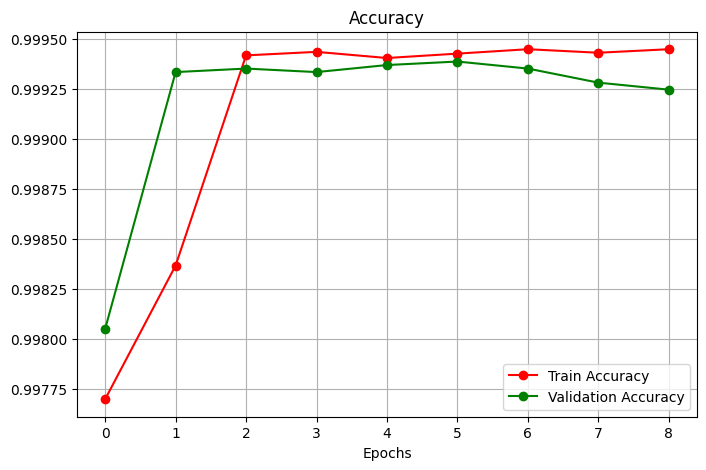

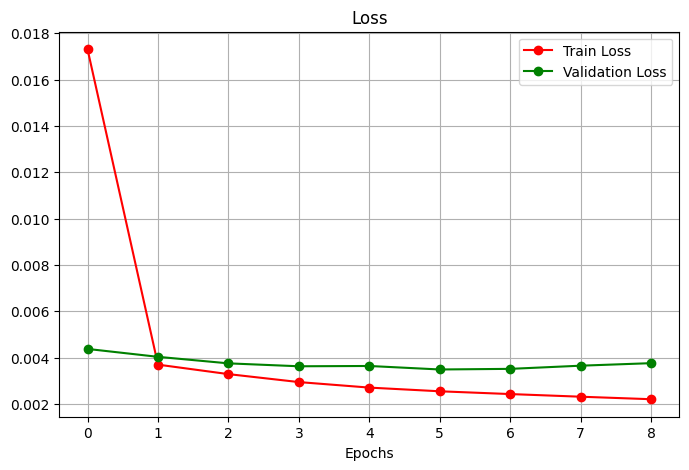

In [41]:
# Train
train_acc = history_class_2.history['acc']
train_loss = history_class_2.history['loss']
# Validation
val_acc = history_class_2.history['val_acc']
val_loss = history_class_2.history['val_loss']

# Plotting section
# Accuracy
plt.figure(figsize=(8,5))
plt.plot(train_acc, 'r-o', label='Train Accuracy')
plt.plot(val_acc, 'g-o', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
# Loss
plt.figure(figsize=(8,5))
plt.plot(train_loss, 'r-o', label='Train Loss')
plt.plot(val_loss, 'g-o', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

In [42]:
classifier_2.save('/content/drive/MyDrive/ML_Aliyari/Mini_Project_3/classifier_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
y_hat = classifier_2.predict(x_test_scaled)

1781/1781 [==============================] - 3s 2ms/step


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
report = classification_report(y_test, np.argmax(y_hat,axis=1), target_names=['no Scam', 'Scam'])
print(report)

              precision    recall  f1-score   support

     no Scam       1.00      1.00      1.00     56851
        Scam       0.79      0.84      0.81       111

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



Text(0.5, 1.0, 'Confusion Matrix for Test data')

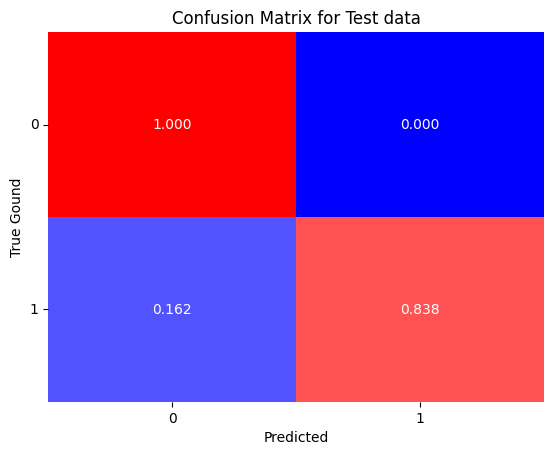

In [48]:
cm = confusion_matrix(y_test, np.argmax(y_hat,axis=1))
cm = cm/np.sum(cm, axis=1).reshape(-1,1)
# Plotting confusion matrix
sns.heatmap(cm, annot=True, cmap='bwr', fmt='.3f',cbar=False);
plt.xticks(np.array(range(0,2)).astype('float32')+0.5, range(0,2));
plt.yticks(np.array(range(0,2)).astype('float32')+0.5, range(0,2), rotation=0);
plt.xlabel('Predicted')
plt.ylabel('True Gound')
plt.title('Confusion Matrix for Test data')

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score

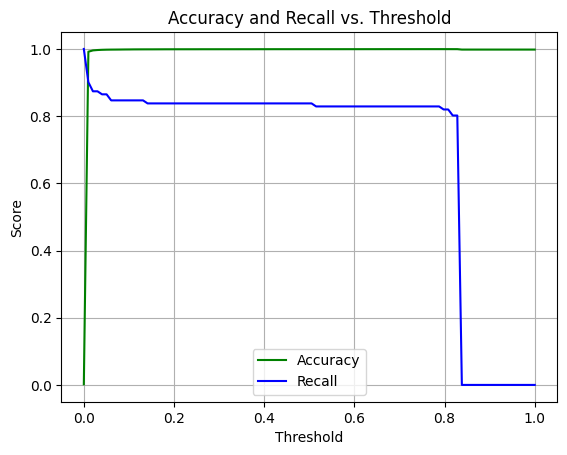

In [50]:
# Make predictions on the validation or test data
y_pred = y_hat[:,1]
# Initialize arrays to store accuracy and recall values
thresholds = np.linspace(0, 1, 100)
accuracies = []
recalls = []

# Iterate over different thresholds
for threshold in thresholds:
    y_pred_binary = (y_pred > threshold).astype(int)
    accuracies.append(accuracy_score(y_test, y_pred_binary))
    recalls.append(recall_score(y_test, y_pred_binary))

# Plot accuracy and recall based on the threshold
plt.plot(thresholds, accuracies,'g-', label='Accuracy')
plt.plot(thresholds, recalls,'b', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Accuracy and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()
